## Fall 2021 Data Science Intern Challenge Answer

Author: Hongtianxu (George) Hua

Original question link: https://docs.google.com/document/d/13VCtoyto9X1PZ74nPI4ZEDdb8hF8LAlcmLH1ZTHxKxE/edit#heading=h.5j27tl9uwcuc

## My Answers

### Question 1

**A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

The average order values (AOV) are calculated as the total revenue divided by the number of orders. After I inspected the dataset, I noticed that there are two different types of purchases. One is bulk purchase with 2000 items each order, the other type is mostly smaller than 250 items per order. This means business partners usually requesting in bulk purchases and normal clients demanding small purchases. And the provided number is calculated by mixing the two groups, which leads to confusing answers.

For addressing the difference, I recommend separating the calculation of AOV by the two groups - business to business (B2B) and business to customers (B2C).

**B. What metric would you report for this dataset?**

For calculating the new AOV, I separated the dataset by (> 500 items per order) and (< 500 items per order). Then I aggregated the dataset by *order_amount* and divided the value by the total amount of orders in each group.

**C. What is its value?**

As a results, I obtained AOV of B2B as \\$704000; AOV of B2C as \\$754.09. The calculation process and analysis in the cell below.

### Question 1 Analysis

In [2]:
# import libraries
import pandas as pd

# read dataframe
df = pd.read_csv("../2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# take a look how the dataframe looks like
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


For finding the reason why the orignal AOV is calcuated as $3145.13, which is unreasonably large. There could be wrong data entries for order_amount, or the distribution of total_items may be extremely unbalanced. So let's take a look at the distribution of total_items first:

<AxesSubplot:>

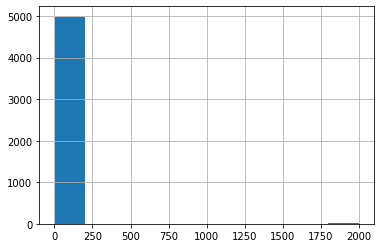

In [4]:
df.total_items.hist()

From the plot we can see there's a small portion of large volumn purchase, and it's likely for business purposes instead of normal customer. If we don't diffrentiate the two group and calculate AOV directly, we got $3145.13, which equals to the amount in the challenge handout.

In [6]:
# calculate AOV on the whole dataset
df["order_amount"].sum() / len(df)

3145.128

Then, let's inspect how does those in bulk purchase orders look like:

In [14]:
df[df["total_items"] > 500]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


From the analysis above, we can see there're two types of users, one is small purchase customers, the other is business customers with bulk purchase, and we should calculate the AOV seperately

In [18]:
# bulk purchase AOV
b2b = df[df["total_items"] > 500]
b2b["order_amount"].sum() / len(b2b)

704000.0

In [19]:
# small purchase AOV
b2c = df[df["total_items"] < 500]
b2c["order_amount"].sum() / len(b2c)

754.0919125025085

### Question 2:

**A. How many orders were shipped by Speedy Express in total?**

```SQL
SELECT count(OrderID)
FROM Orders
INNER JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = "Speedy Express"
```

Result: 54

**B. What is the last name of the employee with the most orders?**

```SQL
SELECT e.EmployeeID, LastName, count(OrderID) AS total_orders
FROM Employees AS e
INNER JOIN Orders AS o
ON e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY total_orders DESC
LIMIT 1
```

Result: Peacock

**C. What product was ordered the most by customers in Germany**

```SQL
SELECT *, count(country_info.ProductID) AS total_orders_from_country
FROM Products AS p
INNER JOIN 
(SELECT c.Country, orders_all.ProductID FROM Customers c
INNER JOIN (SELECT o.OrderID, o.CustomerID, od.ProductID FROM Orders AS o INNER JOIN OrderDetails AS od ON o.OrderID = od.OrderID) orders_all
ON c.customerID = orders_all.customerID
WHERE c.Country = "Germany") AS country_info 
GROUP BY country_info.ProductID
ORDER BY total_orders_from_country DESC
LIMIT 1
```

Result: PRODUCT ID: 31, PRODUCT NAME: Chais